# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract all rows of data
data = soup.find_all('tr', class_='data-row')
data

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list
data_list = []

# Loop through the scraped data to create a list of rows
for row in data:
    rows = row.find_all('td')
    data_list.append(rows)

data_list

[[<td>2</td>,
  <td>2012-08-16</td>,
  <td>10</td>,
  <td>155</td>,
  <td>6</td>,
  <td>-75.0</td>,
  <td>739.0</td>],
 [<td>13</td>,
  <td>2012-08-17</td>,
  <td>11</td>,
  <td>156</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>740.0</td>],
 [<td>24</td>,
  <td>2012-08-18</td>,
  <td>12</td>,
  <td>156</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>741.0</td>],
 [<td>35</td>,
  <td>2012-08-19</td>,
  <td>13</td>,
  <td>157</td>,
  <td>6</td>,
  <td>-74.0</td>,
  <td>732.0</td>],
 [<td>46</td>,
  <td>2012-08-20</td>,
  <td>14</td>,
  <td>157</td>,
  <td>6</td>,
  <td>-74.0</td>,
  <td>740.0</td>],
 [<td>57</td>,
  <td>2012-08-21</td>,
  <td>15</td>,
  <td>158</td>,
  <td>6</td>,
  <td>-78.0</td>,
  <td>740.0</td>],
 [<td>68</td>,
  <td>2012-08-22</td>,
  <td>16</td>,
  <td>158</td>,
  <td>6</td>,
  <td>-77.0</td>,
  <td>740.0</td>],
 [<td>79</td>,
  <td>2012-08-23</td>,
  <td>17</td>,
  <td>159</td>,
  <td>6</td>,
  <td>-76.0</td>,
  <td>742.0</td>],
 [<td>112</td>,
  <td>2012-08-27</td>,
  

In [7]:
headers = soup.find_all('th')
headers

[<th>id</th>,
 <th>terrestrial_date</th>,
 <th>sol</th>,
 <th>ls</th>,
 <th>month</th>,
 <th>min_temp</th>,
 <th>pressure</th>]

In [8]:
mars_list = []
for row in data_list:
    combined_row = {}
    for i in range(len(headers)):
        combined_row[headers[i].text] = row[i].text
    mars_list.append(combined_row)
mars_list

[{'id': '2',
  'terrestrial_date': '2012-08-16',
  'sol': '10',
  'ls': '155',
  'month': '6',
  'min_temp': '-75.0',
  'pressure': '739.0'},
 {'id': '13',
  'terrestrial_date': '2012-08-17',
  'sol': '11',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '740.0'},
 {'id': '24',
  'terrestrial_date': '2012-08-18',
  'sol': '12',
  'ls': '156',
  'month': '6',
  'min_temp': '-76.0',
  'pressure': '741.0'},
 {'id': '35',
  'terrestrial_date': '2012-08-19',
  'sol': '13',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '732.0'},
 {'id': '46',
  'terrestrial_date': '2012-08-20',
  'sol': '14',
  'ls': '157',
  'month': '6',
  'min_temp': '-74.0',
  'pressure': '740.0'},
 {'id': '57',
  'terrestrial_date': '2012-08-21',
  'sol': '15',
  'ls': '158',
  'month': '6',
  'min_temp': '-78.0',
  'pressure': '740.0'},
 {'id': '68',
  'terrestrial_date': '2012-08-22',
  'sol': '16',
  'ls': '158',
  'month': '6',
  'min_temp': '-77.0',
  'pressure': '740.0'},


In [9]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_df = pd.DataFrame(mars_list)

In [10]:
# Confirm DataFrame was created successfully
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [11]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [12]:
# Change data types for data analysis
mars_df = mars_df.astype({'sol': int, 'ls': int, 'month': int, 'min_temp': float, 'pressure': float})

In [13]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

In [14]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [15]:
# 1. How many months are there on Mars?
mars_df[['month','sol']].groupby('month').count()

,sol
month,
1,174
2,178
3,192
4,194
5,149
6,147
7,142
8,141
9,134


In [16]:
# 2. How many Martian days' worth of data are there?
mars_df['sol'].count()

1867

In [17]:
# 3. What is the average low temperature by month?
avg_temps = mars_df[['month', 'min_temp']].groupby('month').mean('min_temp')
avg_temps

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


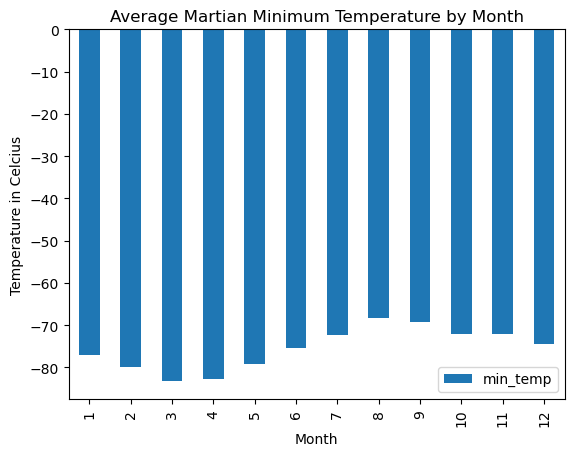

<Figure size 640x480 with 0 Axes>

In [18]:
temp_chart = avg_temps.plot(kind="bar", title="Average Martian Minimum Temperature by Month")
temp_chart.set_xlabel("Month")
temp_chart.set_ylabel("Temperature in Celcius")

plt.show()
plt.tight_layout()

In [19]:
# Identify the coldest and hottest months in Curiosity's location
avg_temps_ordered = mars_df[['month', 'min_temp']].groupby('month').mean('min_temp').sort_values('min_temp')
avg_temps_ordered

,min_temp
month,
3,-83.307292
4,-82.747423
2,-79.932584
5,-79.308725
1,-77.160920
6,-75.299320
12,-74.451807
7,-72.281690
11,-71.985507


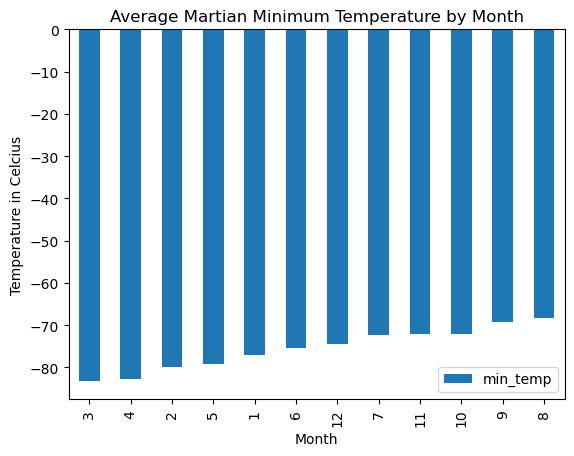

<Figure size 640x480 with 0 Axes>

In [20]:
ordered_temp_chart = avg_temps_ordered.plot(kind="bar", title="Average Martian Minimum Temperature by Month")
ordered_temp_chart.set_xlabel("Month")
ordered_temp_chart.set_ylabel("Temperature in Celcius")

plt.show()
plt.tight_layout()

In [21]:
# 4. Average pressure by Martian month
pressure = mars_df[['month', 'pressure']].groupby('month').mean('pressure')
pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


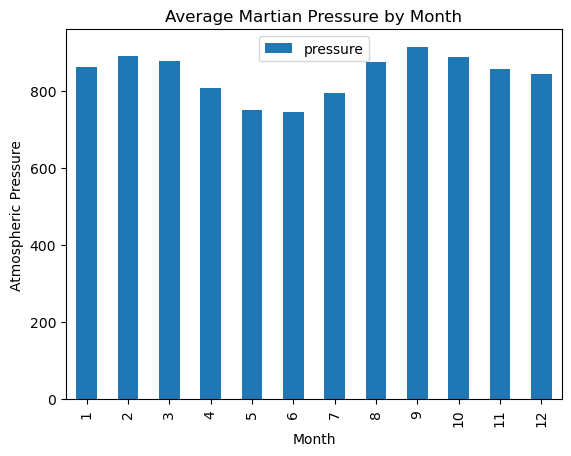

<Figure size 640x480 with 0 Axes>

In [22]:
# Plot the average pressure by month
pressure_chart = pressure.plot(kind="bar", title="Average Martian Pressure by Month")
pressure_chart.set_xlabel("Month")
pressure_chart.set_ylabel("Atmospheric Pressure")

plt.show()
plt.tight_layout()

In [23]:
pressure_ordered = mars_df[['month', 'pressure']].groupby('month').mean('pressure').sort_values('pressure')
pressure_ordered

,pressure
month,
6,745.054422
5,748.557047
7,795.105634
4,806.329897
12,842.156627
11,857.014493
1,862.488506
8,873.829787
3,877.322917


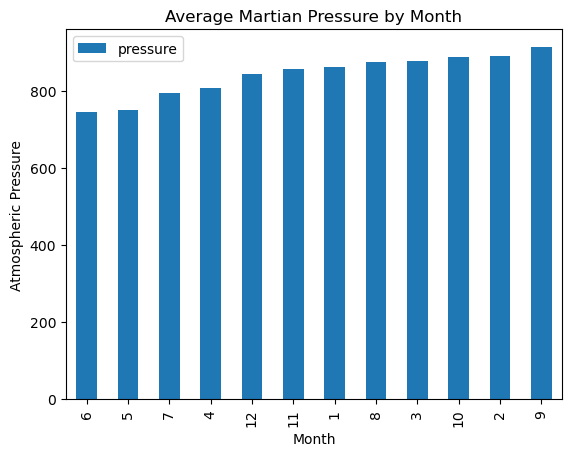

<Figure size 640x480 with 0 Axes>

In [24]:
# Plot the average pressure by month
ordered_pressure_chart = pressure_ordered.plot(kind="bar", title="Average Martian Pressure by Month")
ordered_pressure_chart.set_xlabel("Month")
ordered_pressure_chart.set_ylabel("Atmospheric Pressure")

plt.show()
plt.tight_layout()

In [25]:
temps = mars_df['min_temp']
temps

0      -75.0
1      -76.0
2      -76.0
3      -74.0
4      -74.0
        ... 
1862   -78.0
1863   -77.0
1864   -76.0
1865   -77.0
1866   -77.0
Name: min_temp, Length: 1867, dtype: float64

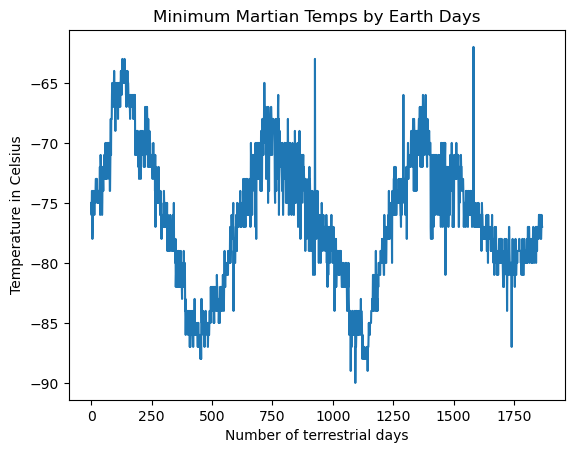

In [26]:
min_temps_chart = temps.plot(kind='line', 
                             title='Minimum Martian Temps by Earth Days', 
                             xlabel='Number of terrestrial days',
                             ylabel='Temperature in Celsius')
plt.show()


### Data Analysis

Q: Which month, on average, has the lowest temperature? The highest?
A: On average, the 3rd month has the lowest temperature and the 8th month has the highest (which was still incredibly cold).

Q: Which month, on average, has the lowest atmospheric pressure? The highest?
A: On average, the 6th month has the lowest atmospheric pressure and the 9th month has the highest.

Q: How many terrestrial days exist in a Martian year?
A: Estimating from the graph of minimum temperatures on Mars, the peaks look like they are at roughly 75, 750 and 1425 on the X-axis, which would make the Mars year equivalent to about 675 Earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [29]:
# Write the data to a CSV
mars_df.to_csv('Output/mars_df.csv', index=False, header=True)

In [30]:
browser.quit()